# Industry: Educational
EduFun nursery is one of the top nurseries in Philadelphia. Every year thousands of parents apply for their child's admission here. Due to the excess applications,
there was an objective to reject these applications with proper response too. So the board decided to classify the applications based on the occupation of parents
and child's nursery, family structure and financial standing, and social and health picture of the family

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score

In [4]:
data=pd.read_csv('C:/Users/MANISH/python/DS & ML/Projects/nursery (1).csv',header=None)

In [5]:
cols=['parents','has_nurs','form','children','housing','finance','social','health','NURSERY']
data.columns=cols

In [6]:
data.head()

,parents,has_nurs,form,children,housing,finance,social,health,NURSERY
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


#### General Data Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   NURSERY   12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


 #### Check for Missing Values

In [8]:
 miss_train=pd.DataFrame({'Col_name':data.columns,'Missing value?':
                          [any(data[x].isnull()) for x in data.columns],
                          'Count_':[sum(data[y].isnull()) for y in data.columns],
                          'Percentage':[sum(data[y].isnull())/data.shape[0] for y in data.columns]})
miss_train.sort_values(by='Count_',ascending=False)


,Col_name,Missing value?,Count_,Percentage
0,parents,False,0,0.0
1,has_nurs,False,0,0.0
2,form,False,0,0.0
3,children,False,0,0.0
4,housing,False,0,0.0
5,finance,False,0,0.0
6,social,False,0,0.0
7,health,False,0,0.0
8,NURSERY,False,0,0.0


####  Explore the data using EDA

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='NURSERY', ylabel='count'>

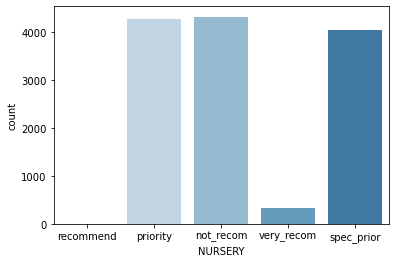

In [9]:
sns.set_palette(sns.color_palette("Blues"))
sns.countplot(data.NURSERY,saturation=0.7)

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


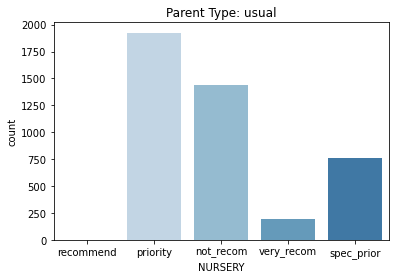

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


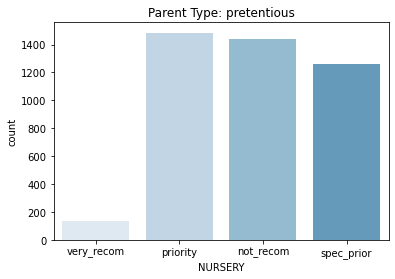

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


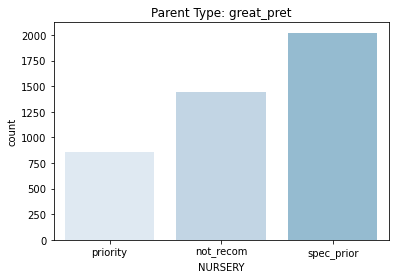

In [10]:
for i in data.parents.unique():
    temp=data[data.parents==i]
    sns.countplot(temp.NURSERY,saturation=0.7)
    plt.title('Parent Type: %s'%i)
    plt.show()


Usual parents get less priority

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


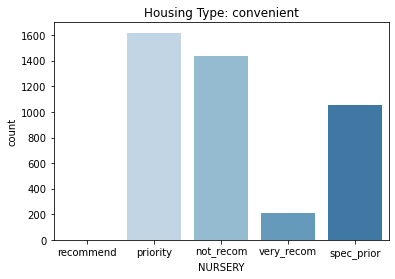

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


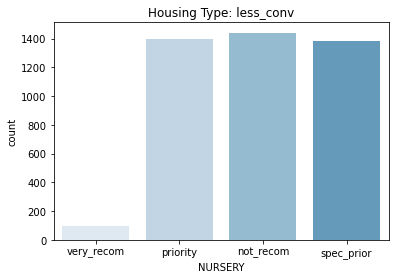

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


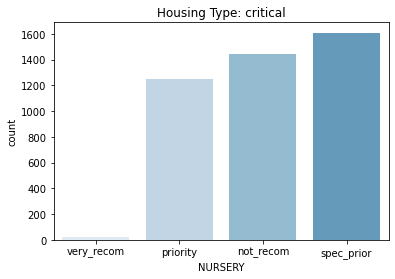

In [11]:
for i in data.housing.unique():
    temp=data[data.housing==i]
    sns.countplot(temp.NURSERY,saturation=0.7)
    plt.title('Housing Type: %s'%i)
    plt.show()


Priority is higher if housing type is critical.


C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


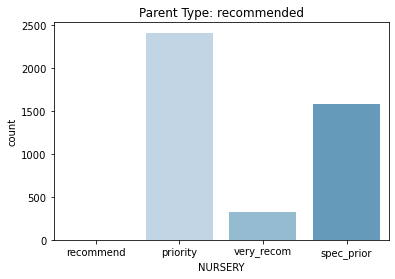

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


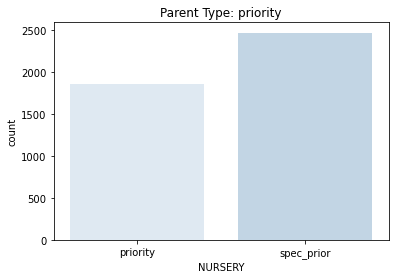

C:\Users\MANISH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


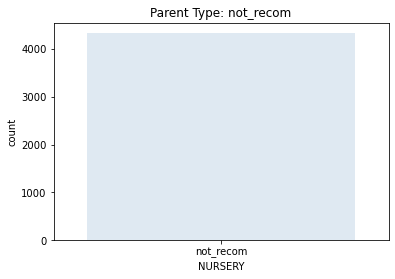

In [12]:
for i in data.health.unique():
    temp=data[data.health==i]
    sns.countplot(temp.NURSERY,saturation=0.7)
    plt.title('Parent Type: %s'%i)
    plt.show()

 clearly see that if health is not good then the child is less likely to be accepted

#### Train a Logistic Model


In [13]:
data_dum=pd.get_dummies(data,columns=cols[:-1])

In [14]:
data_dum.head()

,NURSERY,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
0,recommend,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,priority,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,not_recom,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,recommend,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
4,priority,0,0,1,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


In [15]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(data_dum.drop('NURSERY',axis=1),data_dum.NURSERY, test_size=0.3,random_state=101)

In [16]:
#label encode target variable
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
y_test=lb.fit_transform(y_test)
y_train=lb.fit_transform(y_train)

In [17]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C=0.5,solver = 'sag',multi_class='multinomial',max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(C=0.5, max_iter=1000, multi_class='multinomial',
                   solver='sag')

In [18]:
y_pred=logmodel.predict(X_test)


### Model Evaluation
#### Model Accuracy


In [19]:
 print('The accuracy of the model is: ',round(accuracy_score(y_test,y_pred)*100,2))

The accuracy of the model is:  62.35


#### Confusion Matrix

<AxesSubplot:>

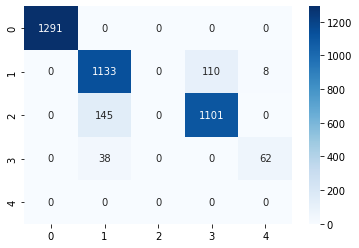

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt='d',cmap='Blues')

#### ROC Curve

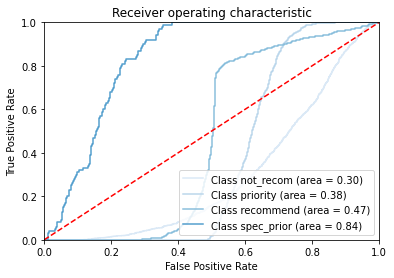

In [22]:
from sklearn.metrics import roc_curve
logmodel_prob=logmodel.predict_proba(X_test).T
dummy_y_test=pd.get_dummies(y_test)
roc_auc=dict()
lfpr4=dict()
ltpr6=dict()
lthresholds4=dict()
for i in dummy_y_test.columns:
    roc_auc[i]=roc_auc_score(dummy_y_test[i],logmodel_prob[i-1])
    lfpr4[i], ltpr6[i], lthresholds4[i] = roc_curve(dummy_y_test[i], logmodel_prob[i-1])

for i in dummy_y_test.columns:
    cls=lb.classes_
    plt.plot(lfpr4[i], ltpr6[i], label='Class '+str(cls[i])+ ' (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

As discussed earlier, if the AUC value is near to 1 it is better as around 90% of data is correctly predicted by the model.


#### Conclusion:
Usual parents are not much prioritized.
Health is directly related to acceptance.
Housing is inversely related to acceptance.
The model predicted with 62.35 accuracy. The model is more specific than sensitive.
The Area under the ROC curve value for spec_prior class is .84, which is better but for other class can be improved.
The overall model could be improved with more data